<a href="https://colab.research.google.com/github/Nub-T/Noob_Computation/blob/main/Sequence_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<i>Sequence Models using TensorFlow (dogol2)</i><br>
--
AUTHOR :
* Khevin Pandapotan
* <a href="https://github.com/Yehezk34">Yehezk34</a>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
assert tf.__version__.startswith('2.')

In [3]:
tf.__version__

'2.4.0'

In [4]:
tf.executing_eagerly()

True

In [6]:
seq = 'AGAACTGCTGACTGATAGATCGCGCGCCGCGCGCGCGGCATGCATCGATGCATGCGCAACTCGAATCGATTGACAGAAGACAATTATGACAATGCGCAGCAGCATTTATTACTACACATACGGTGCACTGCGCGCGCTCACTGCA'
seq_dict = {'A': 0, 'T': 1, 'G': 2, 'C': 3}

In [7]:
obs_seq = np.array([seq_dict[s] for s in seq])
obs_seq

array([0, 2, 0, 0, 3, 1, 2, 3, 1, 2, 0, 3, 1, 2, 0, 1, 0, 2, 0, 1, 3, 2,
       3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 0, 1, 2, 3, 0,
       1, 3, 2, 0, 1, 2, 3, 0, 1, 2, 3, 2, 3, 0, 0, 3, 1, 3, 2, 0, 0, 1,
       3, 2, 0, 1, 1, 2, 0, 3, 0, 2, 0, 0, 2, 0, 3, 0, 0, 1, 1, 0, 1, 2,
       0, 3, 0, 0, 1, 2, 3, 2, 3, 0, 2, 3, 0, 2, 3, 0, 1, 1, 1, 0, 1, 1,
       0, 3, 1, 0, 3, 0, 3, 0, 1, 0, 3, 2, 2, 1, 2, 3, 0, 3, 1, 2, 3, 2,
       3, 2, 3, 2, 3, 1, 3, 0, 3, 1, 2, 3, 0])

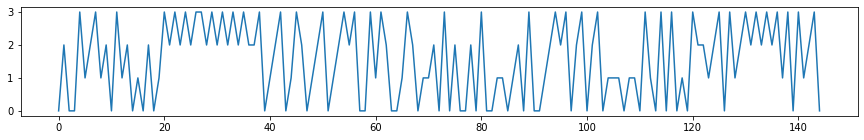

In [8]:
# Now plot them!
fig, ax = plt.subplots(1, 1, figsize=(15, 2))
ax.plot(obs_seq)

In [9]:
# Create the probability matrix!

emissions = np.ones((2, 4))
emissions[0, :] = 0.25
emissions[1, :2] = 0.1
emissions[1, 2:] = 0.4

assert np.all(np.abs(np.sum(emissions, axis=1) - 1.0) < 1e-5)

emissions

array([[0.25, 0.25, 0.25, 0.25],
       [0.1 , 0.1 , 0.4 , 0.4 ]])

In [12]:
# Set the transition

transitions = np.ones((2, 2))
transitions[0, 0] = 0.9
transitions[0, 1] = 0.1
transitions[1, 0] = 0.05
transitions[1, 1] = 0.95

assert np.all(np.abs(np.sum(transitions, axis=1) - 1.0) < 1e-5)

transitions

array([[0.9 , 0.1 ],
       [0.05, 0.95]])

In [16]:
def viterbi(x, transmat, emissions):
    v_seq = np.zeros((len(x), len(transmat)))
    states = np.zeros((len(x), len(transmat)))
    best_states = np.zeros(len(x),  dtype=int)
    for i in range(len(v_seq)):
        if i == 0:
            v_seq[0] = (1/len(transmat)) * emissions[:,x[i]]
            v_seq[0] = np.log(v_seq[0])
            states[0] = np.zeros(len(transmat))
            continue
        p = v_seq[i-1] + np.log(transmat.T)
        states[i] =  np.argmax(p, axis=1)
        v_seq[i] =   np.log(emissions[:,x[i]]) + np.amax(p, axis = 1)
        
    best_states[-1] = np.argmax(v_seq[-1])
    
    for i in reversed(range(1, len(x))):
        best_states[i-1] = states[i][best_states[i]]
        
    return v_seq, states, best_states

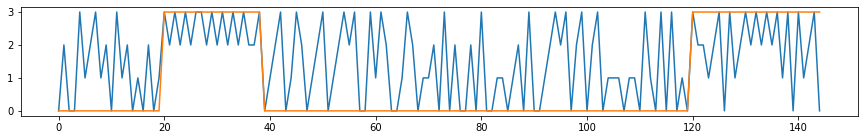

In [19]:
v_seq, states, best_states = viterbi(obs_seq, transitions, emissions)

fig, ax = plt.subplots(1, 1, figsize=(15, 2))
ax.plot(obs_seq)
ax.plot(best_states*3);

In [20]:
# HMM
def sample_hmm(x_len: int = 128):
    emission_states = np.arange(emissions.shape[1])
    transition_states = np.arange(transitions.shape[1])

    states = [np.random.choice(transition_states, p=np.array([0.5, 0.5]))]
    values = []
    
    for i in range(x_len):
        cur_state = states[i]
        emission_prob = emissions[cur_state, :]
        transition_prob = transitions[cur_state, :]
        values.append(np.random.choice(emission_states, p=emission_prob))
        states.append(np.random.choice(transition_states, p=transition_prob))
    return np.array(states[:-1]), np.array(values)

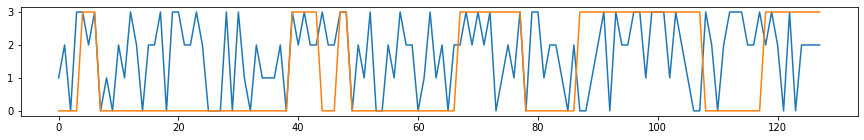

In [23]:
states, values = sample_hmm()

fig, ax = plt.subplots(1, 1, figsize=(15, 2))
ax.plot(values)
ax.plot(states*3);

In [24]:
np.random.seed(12345)

x_data, y_data = [], []
for _ in range(1000):
    states, values = sample_hmm()
    x_data.append(values)
    y_data.append(states)
    
x_train, y_train = x_data[:800], y_data[:800]
x_test, y_test = x_data[800:900], y_data[800:900]
x_valid, y_valid = x_data[900:], y_data[900:]

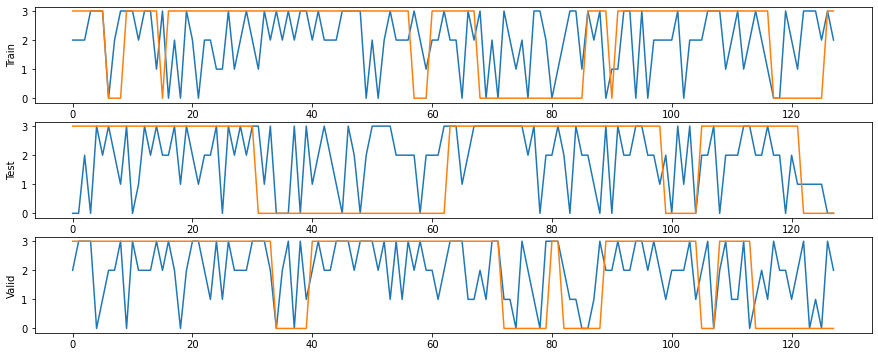

In [25]:
# Now plot them
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 6))
ax1.plot(x_train[0])
ax1.plot(y_train[0]*3)
ax1.set_ylabel('Train')

ax2.plot(x_test[1])
ax2.plot(y_test[1]*3)
ax2.set_ylabel('Test')

ax3.plot(x_valid[2])
ax3.plot(y_valid[2]*3)
ax3.set_ylabel('Valid');

In [26]:
island_lengths = [sum(g) for y in y_train for b, g in itertools.groupby(y) if b == 1]

In [27]:
# Min length
np.min(island_lengths)

1

In [28]:
# Max length
np.max(island_lengths)

120

In [29]:
# Mean
np.mean(island_lengths)

17.569270833333334

In [30]:
# STD
np.std(island_lengths)

16.482247188565722

In [31]:
print('5%  length:    {:0.2f}'.format(np.percentile(island_lengths, 5)))
print('25% length:    {:0.2f}'.format(np.percentile(island_lengths, 25)))
print('Median length: {:0.2f}'.format(np.median(island_lengths)))
print('75% length:    {:0.2f}'.format(np.percentile(island_lengths, 75)))
print('95% length:    {:0.2f}'.format(np.percentile(island_lengths, 95)))

5%  length:    1.00
25% length:    6.00
Median length: 13.00
75% length:    24.00
95% length:    51.00


In [32]:
# One hot encoding for embedding

def one_hot_encoding(x_train, num_classes=4):
    return np.eye(num_classes)[x_train.reshape(-1)]

In [33]:
x_train[0][:10]

array([2, 2, 2, 3, 3, 3, 0, 2, 3, 3])

In [34]:
one_hot_encoding(x_train[0])[:10].T

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 1., 1.]])

In [35]:
x_train_enc = [one_hot_encoding(x) for x in x_train]
x_test_enc = [one_hot_encoding(x) for x in x_test]
x_valid_enc = [one_hot_encoding(x) for x in x_valid]

In [36]:
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, Flatten
from keras.models import Model

In [39]:
input_net = net = Input(shape=(128, 4))

net = Conv1D(filters=8, kernel_size=3, activation='relu', padding='same')(net)
net = MaxPooling1D(pool_size=2)(net)
net = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same')(net)
net = MaxPooling1D(pool_size=2)(net)
net = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(net)
net = UpSampling1D(2)(net)
net = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same')(net)
net = UpSampling1D(2)(net)
net = Conv1D(filters=1, kernel_size=3, activation='sigmoid', padding='same')(net)

model = Model(inputs=input_net, outputs=net)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
model.fit(x=np.array(x_train_enc), y=np.array(y_train), batch_size=100, epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 30ms/step - loss: 0.4388 - accuracy: 0.7989
Epoch 2/100
8/8 [==============================] - 0s 27ms/step - loss: 0.4384 - accuracy: 0.7990
Epoch 3/100
8/8 [==============================] - 0s 26ms/step - loss: 0.4381 - accuracy: 0.7990
Epoch 4/100
8/8 [==============================] - 0s 28ms/step - loss: 0.4389 - accuracy: 0.7982
Epoch 5/100
8/8 [==============================] - 0s 27ms/step - loss: 0.4391 - accuracy: 0.7988
Epoch 6/100
8/8 [==============================] - 0s 28ms/step - loss: 0.4387 - accuracy: 0.7987
Epoch 7/100
8/8 [==============================] - 0s 28ms/step - loss: 0.4379 - accuracy: 0.7991
Epoch 8/100
8/8 [==============================] - 0s 28ms/step - loss: 0.4377 - accuracy: 0.7991
Epoch 9/100
8/8 [==============================] - 0s 27ms/step - loss: 0.4378 - accuracy: 0.7994
Epoch 10/100
8/8 [==============================] - 0s 28ms/step - loss: 0.4373 - accuracy: 0.7996
Epoch 11/100
8/8 [=

In [44]:
# Evaluate our model!
y_hat = model.predict(np.array(x_test_enc))
y_hat

array([[[0.1107316 ],
        [0.04592448],
        [0.02928033],
        ...,
        [0.01726612],
        [0.07559881],
        [0.22469765]],

       [[0.19146693],
        [0.1952509 ],
        [0.27418017],
        ...,
        [0.00274387],
        [0.00550288],
        [0.02837849]],

       [[0.10278997],
        [0.06614715],
        [0.05487752],
        ...,
        [0.8841874 ],
        [0.894806  ],
        [0.81082726]],

       ...,

       [[0.7901038 ],
        [0.8721943 ],
        [0.90477157],
        ...,
        [0.57030517],
        [0.63382655],
        [0.59963423]],

       [[0.17121276],
        [0.15285423],
        [0.22901276],
        ...,
        [0.63679224],
        [0.733189  ],
        [0.69071525]],

       [[0.66959685],
        [0.6152439 ],
        [0.5238657 ],
        ...,
        [0.92703295],
        [0.9353759 ],
        [0.8566551 ]]], dtype=float32)

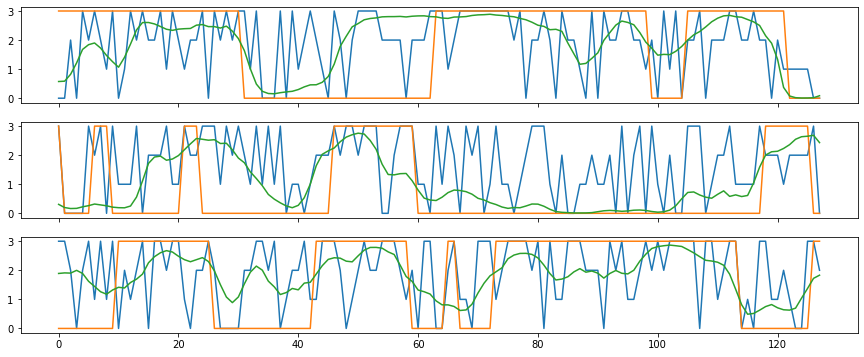

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 6), sharex=True)

ax1.plot(x_test[1])
ax1.plot(y_test[1]*3)
ax1.plot(y_hat[1]*3)

ax2.plot(x_test[2])
ax2.plot(y_test[2]*3)
ax2.plot(y_hat[2]*3)

ax3.plot(x_test[3])
ax3.plot(y_test[3]*3)
ax3.plot(y_hat[3]*3)

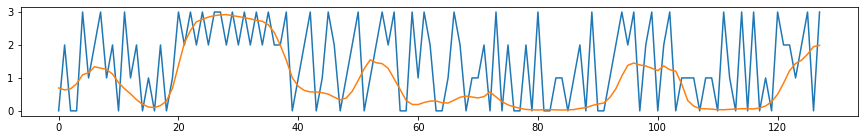

In [46]:
# Take plotting for prediction
y_pred = model.predict(np.array(one_hot_encoding(obs_seq[:128]))[np.newaxis, ...])

fig, ax = plt.subplots(1, 1, figsize=(15, 2))

ax.plot(obs_seq[:128])
ax.plot(y_pred.ravel()*3);

In [47]:
# RNN Architecture!

from keras import layers
from keras.models import Model

RNN = layers.LSTM
SENT_HIDDEN_SIZE = 100
BATCH_SIZE = 200
input_maxlen = 64
query_maxlen = 64
vocab_size = 4

sentence = layers.Input(shape=(input_maxlen, vocab_size))
encoded_sentence = RNN(SENT_HIDDEN_SIZE)(sentence)

preds = layers.Dense(query_maxlen, activation='relu')(encoded_sentence)
preds = layers.Dense(query_maxlen, activation='relu')(preds)

In [49]:
model = Model(sentence, preds)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [53]:
# Truncate?

x_sequence = np.array([x[:input_maxlen] for x in x_train_enc])
y_result = np.array([y[:query_maxlen] for y in y_train])

In [55]:
model.fit([x_sequence], y_result,
          batch_size=BATCH_SIZE,
          epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 147ms/step - loss: 4.7900 - accuracy: 0.0113
Epoch 2/200
4/4 [==============================] - 1s 148ms/step - loss: 4.3550 - accuracy: 0.0037
Epoch 3/200
4/4 [==============================] - 1s 145ms/step - loss: 3.9875 - accuracy: 0.0025
Epoch 4/200
4/4 [==============================] - 1s 145ms/step - loss: 3.5169 - accuracy: 0.0012
Epoch 5/200
4/4 [==============================] - 1s 143ms/step - loss: 3.5095 - accuracy: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 1s 151ms/step - loss: 3.4015 - accuracy: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 1s 145ms/step - loss: 3.4061 - accuracy: 0.0000e+00
Epoch 8/200
4/4 [==============================] - 1s 149ms/step - loss: 3.3936 - accuracy: 0.0037
Epoch 9/200
4/4 [==============================] - 1s 150ms/step - loss: 3.3557 - accuracy: 0.0100
Epoch 10/200
4/4 [==============================] - 1s 148ms/step - loss: 3.3322 - accuracy: 0.00

Overfitting and very low acc!

In [58]:
# Now let's do little change for the architecture!
from tensorflow.keras import layers
from tensorflow.keras.models import Model

RNN = layers.LSTM

SENT_HIDDEN_SIZE = 100
QUERY_HIDDEN_SIZE = 100
BATCH_SIZE = 200

input_maxlen = 64
query_maxlen = 64
vocab_size = 4

sentence = layers.Input(shape=(input_maxlen, vocab_size))
sentence_encoder = RNN(SENT_HIDDEN_SIZE)
encoded_sentence = sentence_encoder(sentence)

question = layers.Input(shape=(query_maxlen, 1))
question_encoder = RNN(QUERY_HIDDEN_SIZE)
encoded_question = question_encoder(question)

merged = layers.concatenate([encoded_sentence, encoded_question])
dense_layer = layers.Dense(query_maxlen, activation='relu')
dense = dense_layer(merged)
pred_layer = layers.Dense(query_maxlen, activation='relu')
preds = pred_layer(dense)

In [59]:
model = Model([sentence, question], preds)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [62]:
x_sequence = np.array([x[:input_maxlen] for x in x_train_enc])
x_query = np.array([y[:query_maxlen, np.newaxis] for y in y_train])
y_result = np.array([y[1:query_maxlen+1] for y in y_train])

In [65]:
model.fit([x_sequence, x_query], y_result,
          batch_size=BATCH_SIZE,
          epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 307ms/step - loss: 2.0758 - accuracy: 0.0050
Epoch 2/300
4/4 [==============================] - 1s 292ms/step - loss: 2.0041 - accuracy: 0.0050
Epoch 3/300
4/4 [==============================] - 1s 281ms/step - loss: 1.9600 - accuracy: 0.0000e+00
Epoch 4/300
4/4 [==============================] - 1s 297ms/step - loss: 1.8901 - accuracy: 0.0012
Epoch 5/300
4/4 [==============================] - 1s 291ms/step - loss: 1.7826 - accuracy: 0.0025
Epoch 6/300
4/4 [==============================] - 1s 290ms/step - loss: 1.7640 - accuracy: 0.0000e+00
Epoch 7/300
4/4 [==============================] - 1s 284ms/step - loss: 1.7532 - accuracy: 0.0000e+00
Epoch 8/300
4/4 [==============================] - 1s 298ms/step - loss: 1.7418 - accuracy: 0.0000e+00
Epoch 9/300
4/4 [==============================] - 1s 296ms/step - loss: 1.7312 - accuracy: 0.0000e+00
Epoch 10/300
4/4 [==============================] - 1s 292ms/step - loss: 1.7227 - accura